In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

2025-12-02 11:08:09.410357: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764670089.421691   10938 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764670089.425232   10938 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764670089.435096   10938 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764670089.435105   10938 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764670089.435106   10938 computation_placer.cc:177] computation placer alr

In [2]:
hrnet_model_name = 'ade20k-hrnetv2-w48/1' 

tfhub_model_name = 'https://tfhub.dev/google/HRNet/' + hrnet_model_name

print('HRNet model selected           :', tfhub_model_name)

HRNet model selected           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


In [3]:
hrnet_model = hub.load(tfhub_model_name)

print('HRNet model loaded           :', tfhub_model_name)

I0000 00:00:1764670091.856999   10938 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9046 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute capability: 7.5


HRNet model loaded           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


In [4]:
img_file = tf.keras.utils.get_file(origin="https://tensorflow.org/images/bedroom_hrnet_tutorial.jpg")
img = np.array(Image.open(img_file))/255.0

67460/67460 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


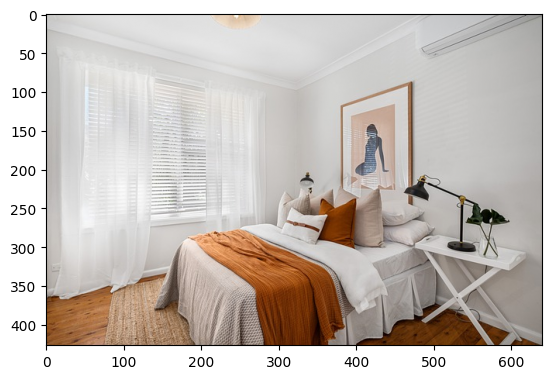

I0000 00:00:1764670109.622688   11042 cuda_dnn.cc:529] Loaded cuDNN version 90300


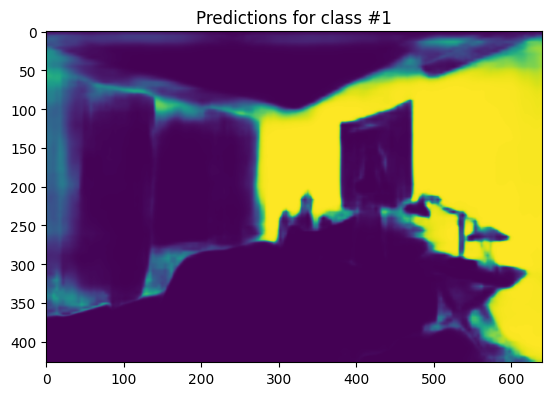

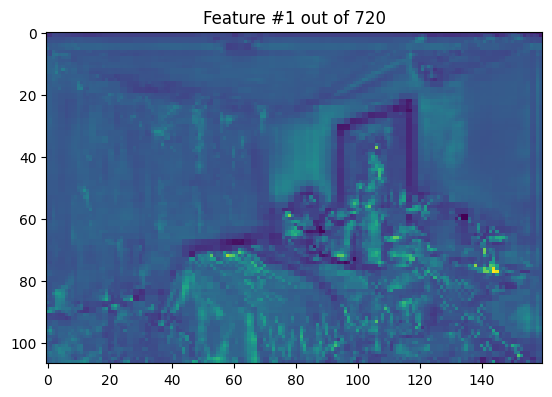

In [5]:
plt.imshow(img)
plt.show()

# Predictions will have shape (batch_size, h, w, dataset_output_classes)
predictions = hrnet_model.predict([img])
plt.imshow(predictions[0,:,:,1])
plt.title('Predictions for class #1')
plt.show() 
# Features will have shape (batch_size, h/4, w/4, 720)
features = hrnet_model.get_features([img])
plt.imshow(features[0,:,:,1])
plt.title('Feature #1 out of 720')
plt.show()